# Linear Regression

## Let's create a line with a random slope
But we won't *print* the slope at any time.
Our goal is to *deduce* the slope by other means.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.random.randn() # Unknown slope if you don't print it. Don't print the slope
x = np.linspace(-1, 1, 11)
y = a*x

def init_plot():
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig, ax

def scatter(x, y, label):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label)
    plt.legend()
    plt.show()

scatter(x, y, label='$y = ax$')

<Figure size 500x500 with 1 Axes>

## OBS. The slope can be deduced from the y axis range. Don't deduce the slope. Don't look at it

Let's make the problem a little bit harder. Instead of having

$x_1=0.0$

$x_2=0.1$

$x_3=0.2$

$\vdots$

$x_{11}=1.0$
    
as before, let's randomly sample 11 points $x_i \in \{-1, 1\}$

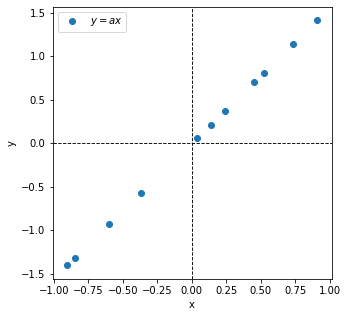

In [2]:
x = np.random.uniform(-1, 1, 11)
y = a*x

scatter(x, y, label='$y = ax$')

And let's add some noise on the y axis:

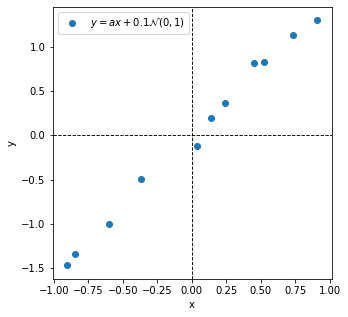

In [3]:
y = a*x + 0.1*np.random.randn(11)

scatter(x, y, label='$y = ax + 0.1\mathcal{N}(0,1)$')

Now let's guess a random slope:

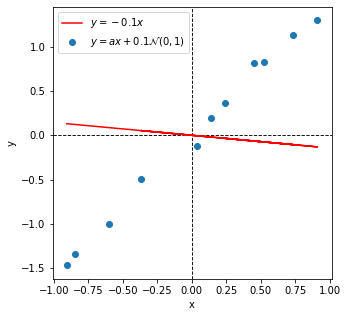

In [4]:
a_ = np.random.randn()

y_ = a_*x

def scatter_and_line(x, y, y_, label_scatter, label_line):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label_scatter)
    ax.plot(x, y_, color='red', label=label_line)
    plt.legend()
    plt.show()
    
scatter_and_line(x, y, y_,
    label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
    label_line=f'$y = {a_:.1f}x$'
)

This line is possibly a very bad fit to the datapoints. To have an idea of how bad our guess was, we can compute a **loss function**.

For example, we can compute the **distance** between every datapoint and the line, measured (for example) in the vertical direction:

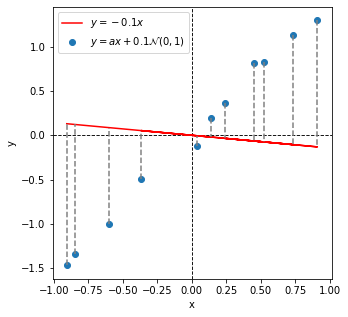

In [5]:
def scatter_line_and_dists(x, y, y_, label_scatter, label_line):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label_scatter)
    ax.plot(x, y_, color='red', label=label_line)
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y_[i]], color='gray', ls='--')
    plt.legend()
    plt.show()
    
scatter_line_and_dists(x, y, y_,
    label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
    label_line=f'$y = {a_:.1f}x$'
)

If we sum the absolute values of all distances we obtain a metric for the overall error of our estimation. But it's best to sum the **squares** of the distances because this will yield a **differentiable function** (more on why that's important later):

In [6]:
def loss_fn(y, y_):
    return sum((y_ - y)**2)

print(f'loss(y, y\') = {loss_fn(y, y_)}')

loss(y, y') = 11.620473729185163


Naturally, different values of $a'$ will yield different losses. Our goal is to find the value for $a'$ which minimizes the loss:

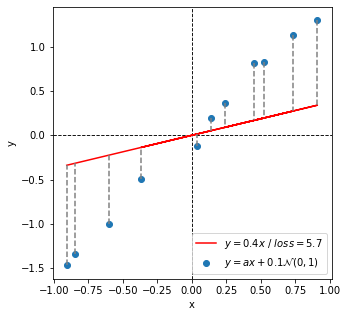

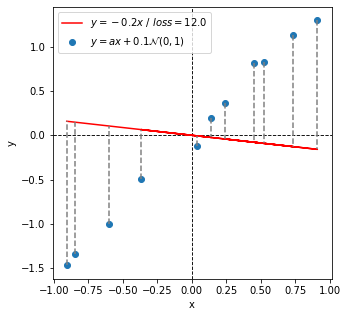

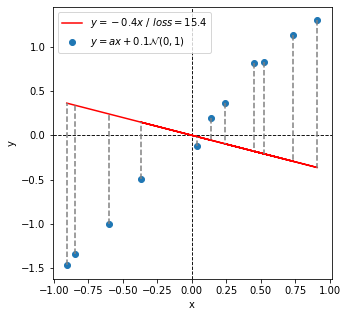

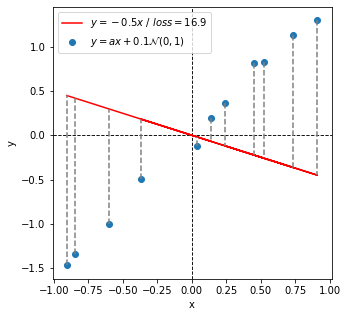

In [7]:
for i in range(4):
    a_ = np.random.randn()
    y_ = a_*x
    scatter_line_and_dists(x, y, y_,
        label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
        label_line=f'$y = {a_:.1f}x$ / $loss = {loss_fn(y, y_):.1f}$'
    )

One simple way to visualize the effect of the **parameter** $a'$ in the loss function is to plot one against the other:

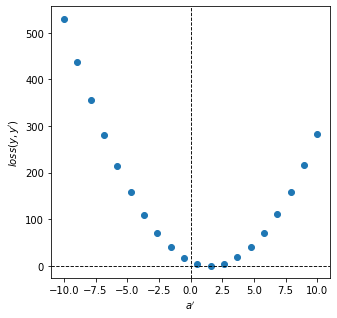

In [8]:
def a__vs_loss(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    plt.show()
    
a__vs_loss(x, y)

What we're doing here is we're **visualizing the loss as a function of our (sole) parameter y'**.

The loss function is a **parabola** because it's defined as the sum of **squared** differences (that is, $\sum_{i} (a'x_i - y_i)^2$).

Note that for our purposes, all $x_i$ and $y_i$ are **constants**. The only parameter under consideration is $a'$, and the expression is quadratic on it:

$\sum_i a'^2 x_i^2 - 2 a' x_i y_i + y_i^2$

If you remember your calculus, you know that you can find the minima / maxima of a function where the slope (derivative) is $=0$:

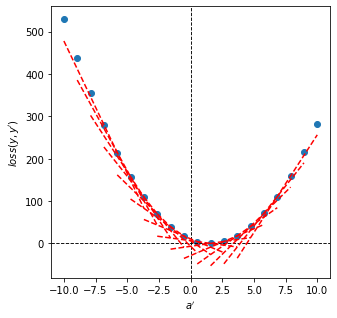

In [9]:
def a__vs_loss_with_derivative(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    for i in range(3, len(a_s)-3):
        slope = (losses[i+1] - losses[i])/(a_s[i+1] - a_s[i])
        intercept = losses[i] - slope*a_s[i]
        ax.plot(
            [a_s[i-3], a_s[i+3]],
            [intercept + slope*a_s[i-3], intercept + slope*a_s[i+3]],
            color='red',
            ls='--'
        )
    plt.show()
    
a__vs_loss_with_derivative(x, y)

Because (only in this case) the loss function is very simple, we can actually find the point of zero derivative analytically **by hand**:

$\frac{\partial}{\partial a'} \sum_i a'^2 x_i^2 - 2 a' x_i y_i + y_i^2 = \sum_i 2a' x_i^2 - 2 x_i y_i = 2a' \sum_i x_i^2 - 2 \sum_i x_i y_i$

1. $2a' \sum_i x_i^2 - 2 \sum_i x_i y_i = 0$
2. $a' \sum_i x_i^2 = \sum_i x_i y_i$
3. $a' = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

But on practical deep learning scenarios the loss function will be huge. So it's very useful to compute the derivatives with an algorithm.

You can do that with (for example) **Pytorch**, **Tensorflow** or **Flux**

In [30]:
import torch

def model(x, a_):
    return a_*x

# we need to convert numpy arrays to torch tensors
x = torch.tensor(x).float()
y = torch.tensor(y).float()

a_opt, deriv_opt = None, None
for a_ in np.linspace(-10, 10, 30):
    a_ = torch.tensor(a_, requires_grad=True).float()
    y_ = model(x, a_)
    loss = loss_fn(y, y_)
    loss.backward() # <--- this computes derivatives
    
    deriv = a_.grad # <--- derivatives can be acessed with ".grad"
    
    print(f'a\'= {a_:+.1f} | ∂loss/∂a\'= {deriv:+.1f}')
    
    # Let's look for the derivative closest to zero
    # i.e. to the most horizontal slope
    if not a_opt or abs(deriv - 0) < abs(deriv_opt - 0):
        a_opt = a_
        deriv_opt = deriv
        
print(f'Optimum a\' is ={a_opt}')

a'= -10.0 | ∂loss/∂a'= -91.7
a'= -9.3 | ∂loss/∂a'= -86.3
a'= -8.6 | ∂loss/∂a'= -80.8
a'= -7.9 | ∂loss/∂a'= -75.3
a'= -7.2 | ∂loss/∂a'= -69.8
a'= -6.6 | ∂loss/∂a'= -64.4
a'= -5.9 | ∂loss/∂a'= -58.9
a'= -5.2 | ∂loss/∂a'= -53.4
a'= -4.5 | ∂loss/∂a'= -48.0
a'= -3.8 | ∂loss/∂a'= -42.5
a'= -3.1 | ∂loss/∂a'= -37.0
a'= -2.4 | ∂loss/∂a'= -31.5
a'= -1.7 | ∂loss/∂a'= -26.1
a'= -1.0 | ∂loss/∂a'= -20.6
a'= -0.3 | ∂loss/∂a'= -15.1
a'= +0.3 | ∂loss/∂a'= -9.7
a'= +1.0 | ∂loss/∂a'= -4.2
a'= +1.7 | ∂loss/∂a'= +1.3
a'= +2.4 | ∂loss/∂a'= +6.8
a'= +3.1 | ∂loss/∂a'= +12.2
a'= +3.8 | ∂loss/∂a'= +17.7
a'= +4.5 | ∂loss/∂a'= +23.2
a'= +5.2 | ∂loss/∂a'= +28.6
a'= +5.9 | ∂loss/∂a'= +34.1
a'= +6.6 | ∂loss/∂a'= +39.6
a'= +7.2 | ∂loss/∂a'= +45.1
a'= +7.9 | ∂loss/∂a'= +50.5
a'= +8.6 | ∂loss/∂a'= +56.0
a'= +9.3 | ∂loss/∂a'= +61.5
a'= +10.0 | ∂loss/∂a'= +66.9
Optimum a' is =1.7241379022598267


/home/marcelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/home/marcelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


## We can visualize the optimum on the XY plane:

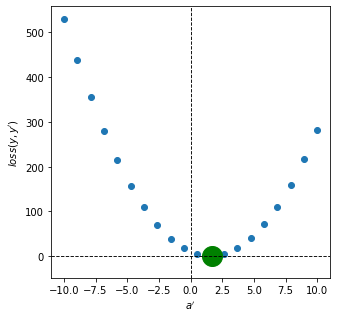

In [28]:
x = x.detach().numpy()
y = y.detach().numpy()

def a__vs_loss_with_opt(x, y, a_opt):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    
    y_ = model(x, a_opt)
    ax.scatter([a_opt], [loss_fn(y, y_)], color='green', s=400)
    plt.show()
    
a__vs_loss_with_opt(x, y, a_opt)

## The problem
is that we'll almost never deal with such an well-behaved problem.

Most of the time, the relationship we wish to capture with machine learning involves more than one independent variable.

Consider, for example, a linear relationship

$y = a_1 x_1 a_2 x_2 + 0.1\mathcal{N}(0, 1)$

over two independent variables (with some noise added)

<IPython.core.display.Javascript object>


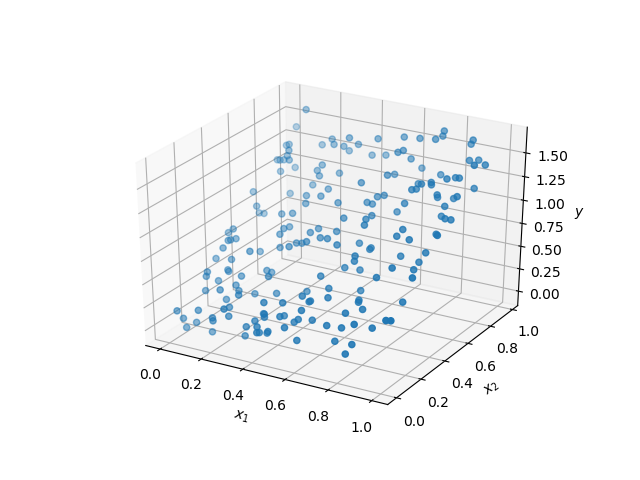

In [363]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

a1 = torch.randn(1)
a2 = torch.randn(1)

x1 = torch.rand(200)
x2 = torch.rand(200)

y = a1*x1 + a2*x2 + 0.1*torch.randn(200)

def plot_scatter_3D():

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')

    ax.scatter(x1, x2, y)

    plt.show()
    
plot_scatter_3D()

# In order to avoid
having to iterate over a large number of combinations of candidate values for $a_1$ and $a_2$, let's do something different:

Let's **model** the linear relationship. Let's create two **parameters** $b_1, b_2$ and model the dependent variable $y$ as:

$y = b_1 x_1 + b_2 x_2$

for **some** combination of values for $b_1, b_2$ we'll get a perfect fit for our target linear relationship (ignoring noise, of course). Also because our model matches exactly with the correct model for the linear relationship, we expect the best parametrization to be

$b_1 = a_1$

$b_2 = a_2$

Let's see what how bad a fit we get by initializing $b_1$ and $b_2$ randomly:

<IPython.core.display.Javascript object>


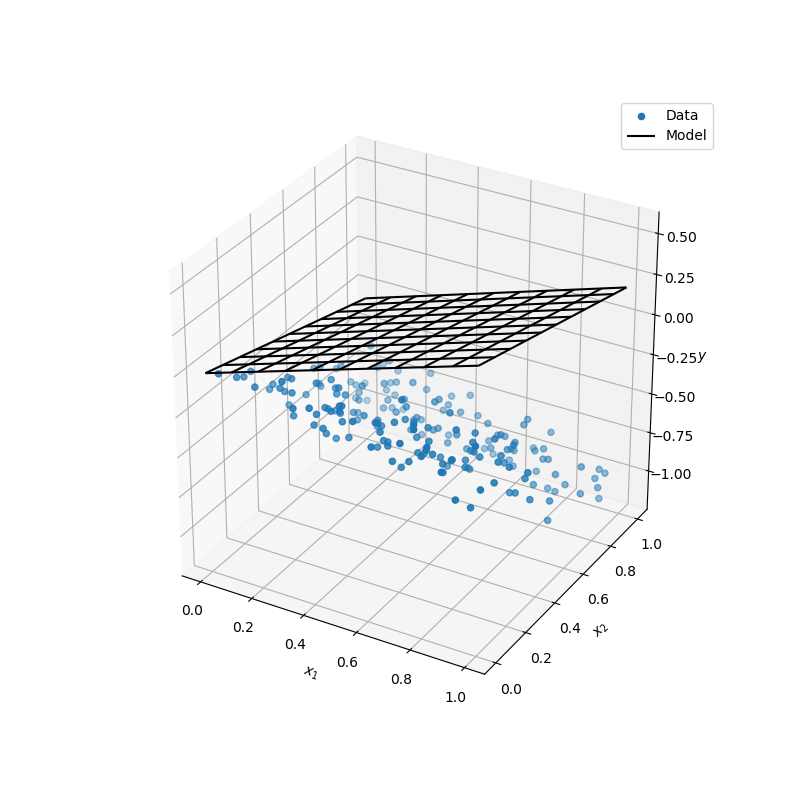

In [191]:
%matplotlib notebook
b1 = torch.randn(1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)

def y_model(x1, x2):
    return b1*x1 + b2*x2


def plot_surface_and_scatter_3D():

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')

    ax.scatter(x1, x2, y, label='Data')
    
    X1 = np.outer(np.linspace(0, 1, 100), np.ones(100))
    X2 = X1.copy().T
    Y = y_model(torch.tensor(X1).float(), torch.tensor(X2).float()).detach().numpy()
    
    ax.plot_wireframe(X1, X2, Y, rstride=10, cstride=10, color='black', label='Model')
    plt.legend()

    plt.show()
    
plot_surface_and_scatter_3D()

## If we apply our model to our datapoints,

(that is, all $(x_{1i}, x_{2i})$ pairs)

we can then compute the same *squared errors* we computed before for the 1D linear models:

<IPython.core.display.Javascript object>


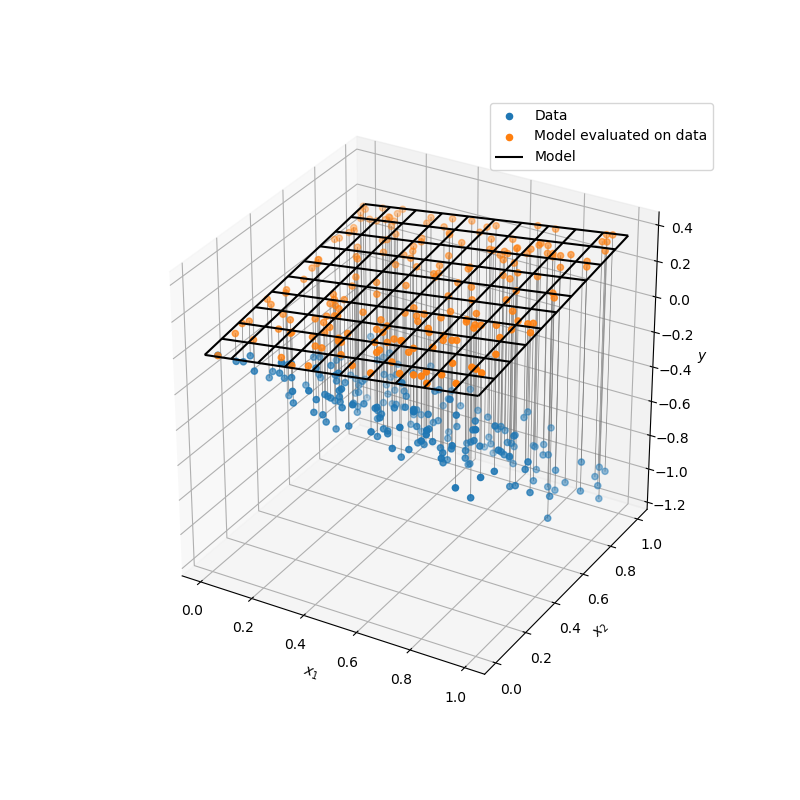

In [181]:
%matplotlib notebook
def plot_surface_and_both_scatters_3D():

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')

    ax.scatter(x1, x2, y, label='Data')
    ax.scatter(x1, x2, y_model(x1, x2).detach(), label='Model evaluated on data')
    for i in range(len(x1)):
        ax.plot(
            [x1[i], x1[i]],
            [x2[i], x2[i]],
            [y[i], y_model(x1[i], x2[i])],
            color = 'gray',
            lw = .5
        )
        
    X1 = np.outer(np.linspace(0, 1, 100), np.ones(100))
    X2 = X1.copy().T
    Y = y_model(torch.tensor(X1).float(), torch.tensor(X2).float()).detach().numpy()
    
    ax.plot_wireframe(X1, X2, Y, rstride=10, cstride=10, color='black', label='Model')
    
    plt.legend()
    
    plt.show()
    
plot_surface_and_both_scatters_3D()

## Perhaps it's not so easy to see,
but each vertical line corresponds to an **error** here. An error is just a *difference* computed between the **prediction** for a given **input** and the corresponding **label** (i.e. the correct answer) for that same input.

Note that I'm chosing to write about **a** difference as opposed to **the** difference. That's because there is a myriad of metrics you can choose from to compute differences. A very common one is the *squared* difference. That is:

$loss(y, y_{pred}) = (y - y_{pred})^2$

Also I'm using "*loss*" for the error function because that's the nomenclature typically used in DL. But the concept is the same.

Anyway, let's compute the loss for our current parametrization:

In [182]:
def loss_fn(y, y_pred):
    return ((y - y_pred)**2).mean()

y_pred = y_model(x1, x2)

loss = loss_fn(y, y_pred)

print(f'Loss = {loss:.3f}')

Loss = 0.644


In [183]:
# Equivalent:
loss_fn = torch.nn.MSELoss()

y_pred = y_model(x1, x2)

loss = loss_fn(y, y_pred)

print(f'Loss = {loss:.3f}')

Loss = 0.644


## OK now let's visualize the **loss surface** of our problem:

<IPython.core.display.Javascript object>


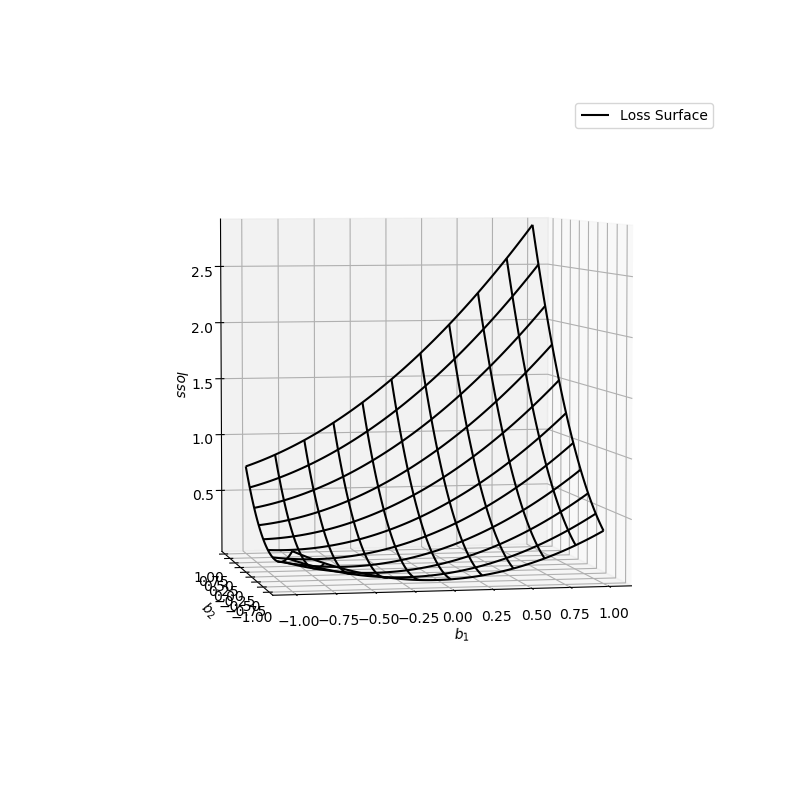

In [242]:
%matplotlib notebook
def plot_loss_surface():

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$b_1$')
    ax.set_ylabel('$b_2$')
    ax.set_zlabel('$loss$')
    
    def loss_given_parameters(b1, b2):
        y_pred = b1*x1 + b2*x2
        return loss_fn(y, y_pred)
    
    B1 = np.outer(np.linspace(-1, +1, 100), np.ones(100))
    B2 = B1.copy().T
    LOSS = np.zeros((100, 100))
    for i, b1 in enumerate(B1[:, 0]):
        for j, b2 in enumerate(B1[:, 0]):
            LOSS[i, j] = loss_given_parameters(b1, b2)
    
    ax.plot_wireframe(B1, B2, LOSS, rstride=10, cstride=10, color='black', label='Loss Surface')
    plt.legend()

    plt.show()
    
plot_loss_surface()

## Note that the loss surface is **defined** by our training data
this means that if we were to add more noise to $y$, we should expect the loss surface to change

<IPython.core.display.Javascript object>


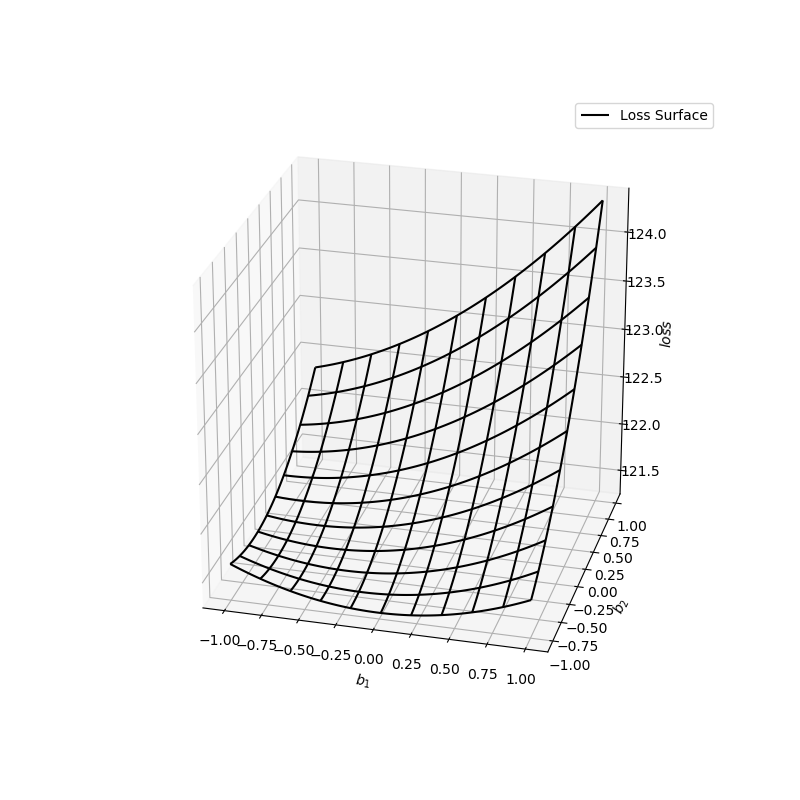

In [243]:
more_noise = 10*torch.randn(200)

y += more_noise

plot_loss_surface()

y -= more_noise

## You should remember from calculus
that the **gradient** is like a generalized derivative. It points towards the direction of steepest ascent in a surface (or any other multidimensional function)

The gradient is just a vector of derivatives along each variable. In the case of the loss function, these variables are $b_1, b_2$. The gradient is:

$\nabla loss = \left(\begin{array}
\\
\frac{\partial~loss}{\partial b_1} \\
\frac{\partial~loss}{\partial b_2}
\end{array}\right)$

Anyway, let's visualize the gradient on the loss function:

Gradient = tensor([5.3903, 4.1556])


<IPython.core.display.Javascript object>


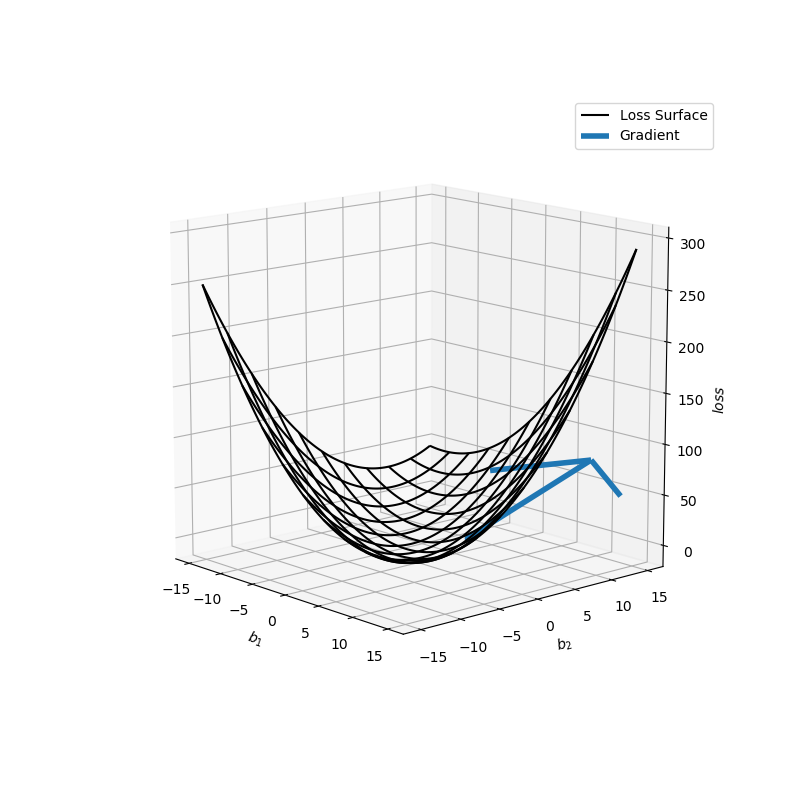

In [277]:
# First let's initialize b1 and b2 with ridiculous values
b1 = 5*torch.randn(1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)

b1.retain_grad()
b2.retain_grad()

def y_model(x1, x2):
    return b1*x1 + b2*x2

# Compute predictions
y_pred = y_model(x1, x2)
# Compute loss
loss = loss_fn(y, y_pred)
# Compute derivatives
loss.backward()
# Get gradient
grad = torch.tensor([b1.grad, b2.grad])
print(f'Gradient = {grad}')

def plot_loss_surface_with_gradient():

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$b_1$')
    ax.set_ylabel('$b_2$')
    ax.set_zlabel('$loss$')
    
    def loss_given_parameters(b1_, b2_):
        y_pred = b1_*x1 + b2_*x2
        return loss_fn(y, y_pred)
    
    B1 = np.outer(np.linspace(-15, +15, 100), np.ones(100))
    B2 = B1.copy().T
    LOSS = np.zeros((100, 100))
    for i, b1_ in enumerate(B1[:, 0]):
        for j, b2_ in enumerate(B2[0, :]):
            LOSS[i, j] = loss_given_parameters(b1_, b2_)
    
    ax.plot_wireframe(B1, B2, LOSS, rstride=10, cstride=10, color='black', label='Loss Surface')
    
    ax.scatter([b1], [b2], [loss.detach()])

    ax.quiver(
        [b1],
        [b2],
        [loss_given_parameters(b1, b2)],
        
        [b1 + 1*grad[0]],
        [b2 + 1*grad[1]],
        [loss_given_parameters(b1 + 1*grad[0], b2 + 1*grad[1])],
        
        lw = 4,
        label='Gradient'
    )
    
    plt.legend()

    plt.show()
    
plot_loss_surface_with_gradient()

## The gradient points towards
the direction of steepest ascent, so if we move in the **opposite** direction we move in the direction in which the loss function **decreases** the most.

If we take a large number of small steps in the direction of the gradient (recomputing the gradient at every step, **because the parametrization changes and therefore the loss function as well**), we can hopefully decrease the loss of our model.

## This is a good time to learn how a Pytorch Module works
This one below is identical to the linear model we've defined before:

In [424]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.b1 = torch.nn.Parameter(torch.randn(1), requires_grad=True)
        self.b2 = torch.nn.Parameter(torch.randn(1), requires_grad=True)
        
    def forward(self, x):
        return self.b1*x[:, 0] + self.b2*x[:, 1]
    
model = LinearModel()
print(list(model.parameters()))

[Parameter containing:
tensor([1.8017], requires_grad=True), Parameter containing:
tensor([-0.2516], requires_grad=True)]


## Also let's

In [435]:
# Let's turn x1 and x2 into a single tensor

a1 = torch.randn(1)
a2 = torch.randn(1)

n = 10**3

x = torch.rand(n, 2)
y = (a1*x[:, 0] + a2*x[:, 1] + .0*torch.randn(n, 1)).unsqueeze(1)

for epoch_i in range(2*10**3):
    y_pred = model(x)
    loss = loss_fn(y, y_pred)
    model.zero_grad()
    loss.backward()
    for param in model.parameters():
        param.data = param.data - .01*param.grad.data
    if epoch_i%10**2 == 0:
        print(f'Epoch {epoch_i} loss={loss.detach():.3f}')
    
print(list(model.parameters()))
print(a1, a2)

Epoch 0 loss=0.053
Epoch 100 loss=0.024
Epoch 200 loss=0.016
Epoch 300 loss=0.011
Epoch 400 loss=0.008
Epoch 500 loss=0.006
Epoch 600 loss=0.004
Epoch 700 loss=0.003
Epoch 800 loss=0.002
Epoch 900 loss=0.002
Epoch 1000 loss=0.001
Epoch 1100 loss=0.001
Epoch 1200 loss=0.001
Epoch 1300 loss=0.000
Epoch 1400 loss=0.000
Epoch 1500 loss=0.000
Epoch 1600 loss=0.000
Epoch 1700 loss=0.000
Epoch 1800 loss=0.000
Epoch 1900 loss=0.000
[Parameter containing:
tensor([0.1847], requires_grad=True), Parameter containing:
tensor([-0.8205], requires_grad=True)]
tensor([0.2001]) tensor([-0.8357])


## Ok, up until now we've worked with linear relationships,
which do not require deep learning to be modelled.

## Let's try with something different:

<IPython.core.display.Javascript object>


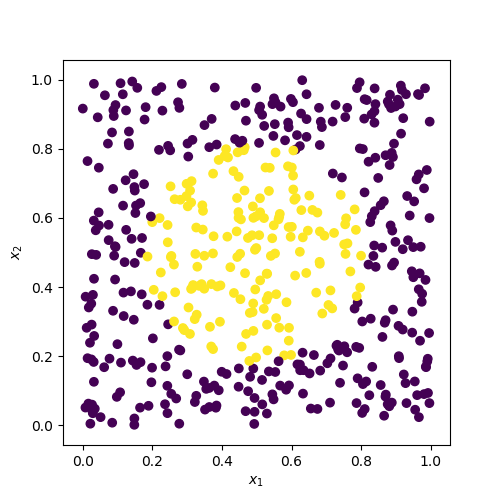

In [294]:
x1 = torch.rand(500)
x2 = torch.rand(500)
y = (x1-.5)**2 + (x2-.5)**2 < .1

def scatter2D(x1, x2, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    ax.scatter(x1, x2, c=y)
    plt.show()

scatter2D(x1, x2, y)